In [1]:
import numpy as np

## Sample preparation

In [2]:
import generator

C:\Users\Anvar\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [3]:
shape = (500, 500)
porsty = 0.3
blobns = 2
noise_prob = 0.05
num_of_angles = 180
tag = 'train'

sinogram shape:  (708, 180)
reconstruction shape:  (708, 708)
changing existed file
editing file already exists


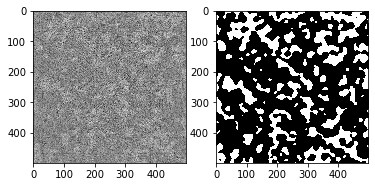

In [4]:
orig_phantom_train, proc_phantom_train = generator.create_phantom_and_process(shape, porsty, blobns, noise_prob, num_of_angles, tag)

sinogram shape:  (708, 180)
reconstruction shape:  (708, 708)
changing existed file
editing file already exists


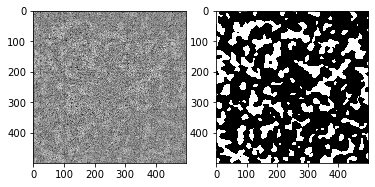

In [5]:
tag = 'test'
orig_phantom_test, proc_phantom_test = generator.create_phantom_and_process(shape, porsty, blobns, noise_prob, num_of_angles, tag)

## View results

In [6]:
import data_manager as dm
dm.show_data_info()

files with dimension 3 does not exist


,dimension,id_indx,porositiy,blobiness,num_of_angles,noise,tags (tring array)
0,2,1,0.3,2,180,0.05,"[test, train]"
1,2,2,0.2,4,360,0.00,"[test1, test2, train]"


In [7]:
import pixel_counter as pc

tag = 'train'
indx = 1
dim = 2

pc.count_neighbor_average_array_and_save(dim, indx, tag)

## TRAIN

In [8]:
wtr = 'csv'
pixels_df = dm.get_data(dimension=dim, id_indx=indx, what_to_return=wtr, tag=tag)

In [9]:
pixels_df.head()

,neighbor_average,proc_phantom_pixel_values,pixel_real_value
0,-0.261660,0.352501,False
1,-0.399983,-1.546677,False
2,-0.768885,-0.060104,False
3,-0.194671,0.064632,False
4,0.001351,-0.217928,False


In [10]:
X_train = np.asarray(pixels_df[['neighbor_average', 'proc_phantom_pixel_values']])
X_train[0:5]

array([[-2.61660162e-01,  3.52501181e-01],
       [-3.99982922e-01, -1.54667666e+00],
       [-7.68885435e-01, -6.01041517e-02],
       [-1.94671470e-01,  6.46315769e-02],
       [ 1.35131610e-03, -2.17928150e-01]])

In [11]:
Y_train = np.asarray(pixels_df['pixel_real_value'])
Y_train[0:5]

array([False, False, False, False, False])

In [12]:
from sklearn import preprocessing
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_train[0:5]

array([[-0.90860987,  0.05911484],
       [-1.14080876, -1.48103824],
       [-1.76007601, -0.27549067],
       [-0.79615766, -0.17433526],
       [-0.46709921, -0.40347927]])

## TEST

In [13]:
tag = 'test'
indx = 1
dim = 2

pc.count_neighbor_average_array_and_save(dim, indx, tag)
wtr = 'csv'

pixels_df = dm.get_data(dimension=dim, id_indx=indx, what_to_return=wtr, tag=tag)

In [14]:
pixels_df.head()

,neighbor_average,proc_phantom_pixel_values,pixel_real_value
0,0.739242,1.110674,True
1,0.753923,0.659263,True
2,0.885821,1.811804,True
3,1.476014,1.450514,True
4,1.650607,1.441874,True


In [15]:
X_test = np.asarray(pixels_df[['neighbor_average', 'proc_phantom_pixel_values']])
X_test[0:5]

array([[0.73924189, 1.11067442],
       [0.75392277, 0.65926332],
       [0.88582076, 1.81180353],
       [1.47601399, 1.45051373],
       [1.65060729, 1.44187418]])

In [16]:
Y_test = np.asarray(pixels_df['pixel_real_value'])
Y_test[0:5]

array([ True,  True,  True,  True,  True])

In [17]:
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test[0:5]

array([[0.7713146 , 0.66564248],
       [0.79579152, 0.3053805 ],
       [1.01570038, 1.22519931],
       [1.99970876, 0.9368613 ],
       [2.29080202, 0.92996625]])

<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, Y_train)

Prediction:

In [19]:
yhat = LR.predict(X_test)
print(len(yhat))
print(len(X_test))

248004
248004


In [20]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(Y_test, yhat)

0.8590103385429267

## Making 2d image

In [21]:
a = np.asarray([1,2,3,4,5,6,7,8,9])

In [22]:
import matplotlib.pyplot as plt

In [23]:
def to_img(lin_arr, r = False):
    _, ax = plt.subplots(figsize = (10,10))
    size = int(round(np.sqrt(len(lin_arr))))
    img = lin_arr.reshape((size, size))
    ax.imshow(img, cmap = 'gray')
    if r:
        return img

Original img

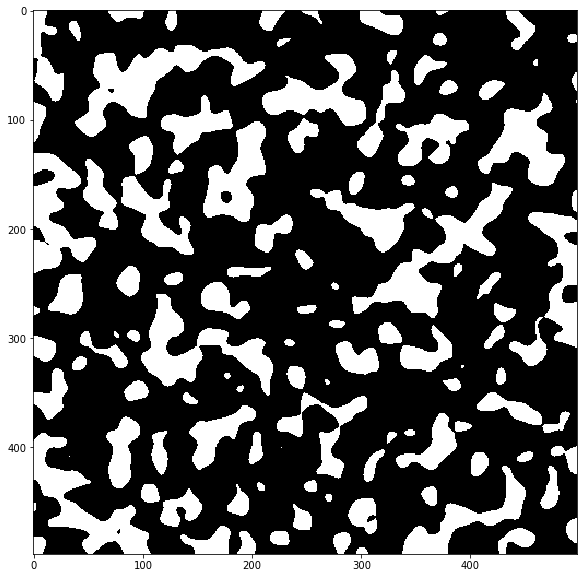

In [24]:
to_img(Y_test)

Binarized img

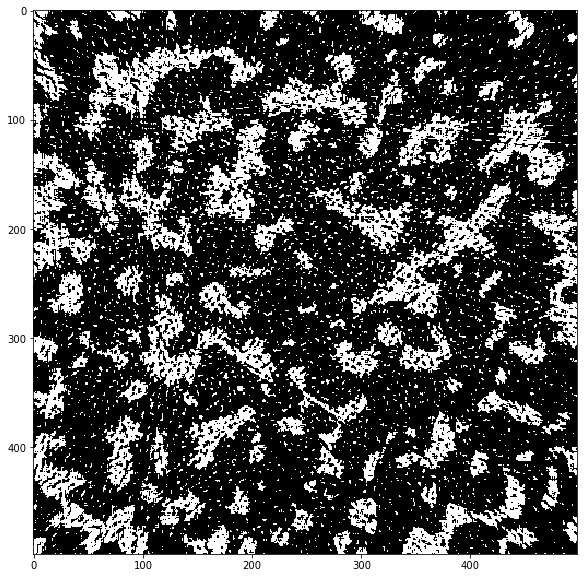

In [25]:
to_img(yhat)

In [26]:
jaccard_similarity_score(Y_test, yhat)

0.8590103385429267

## Gray img

In [27]:
X_test = np.asarray(pixels_df[['proc_phantom_pixel_values']])
X_test[0:5]

array([[1.11067442],
       [0.65926332],
       [1.81180353],
       [1.45051373],
       [1.44187418]])

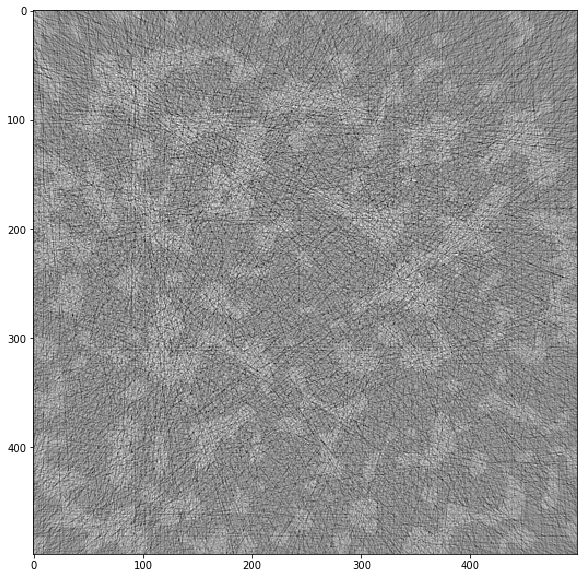

In [28]:
img = to_img(X_test, True)

In [29]:
def binarize(signal, threshold=0.5):
    signal = np.asarray(signal)
    return signal > threshold

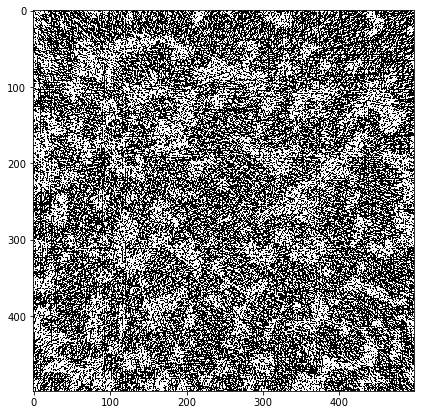

In [30]:
bin_img = binarize(img)
_, ax = plt.subplots(figsize = (7,7))
ax.imshow(bin_img, cmap = 'gray')

In [31]:
Y_binarized = np.concatenate(bin_img)

In [32]:
jaccard_similarity_score(Y_test, Y_binarized)

0.6514007838583249

## Otsu

In [33]:
def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weigth = 1.0/pixel_number
    his, bins = np.histogram(gray, np.arange(0,257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)
    for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])
        Wb = pcb * mean_weigth
        Wf = pcf * mean_weigth

        mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
        #print mub, muf
        value = Wb * Wf * (mub - muf) ** 2

        if value > final_value:
            final_thresh = t
            final_value = value
    final_img = gray.copy()
    print(final_thresh)
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img

In [34]:
otsu_bin_img = otsu(img)

C:\Users\Anvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


1


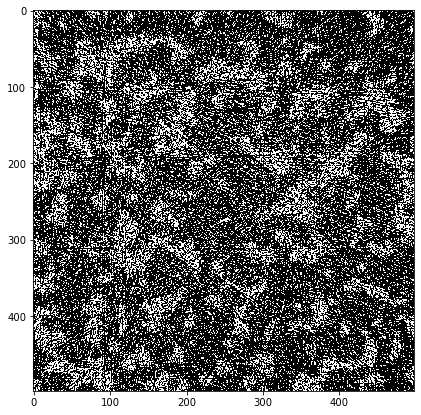

In [35]:
_, ax = plt.subplots(figsize = (7,7))
ax.imshow(otsu_bin_img, cmap = 'gray')

In [36]:
Y_binarized_otsu = np.concatenate(otsu_bin_img)

In [37]:
jaccard_similarity_score(Y_test, Y_binarized_otsu)

0.5696319414202997

## Gaus+binarization

In [38]:
from scipy.ndimage import gaussian_filter as gfilter

In [39]:
gaus_bin_img = binarize(gfilter(img, 3))

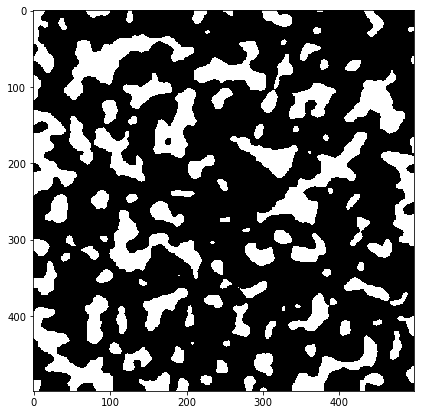

In [40]:
_, ax = plt.subplots(figsize = (7,7))
ax.imshow(gaus_bin_img, cmap = 'gray')

original:

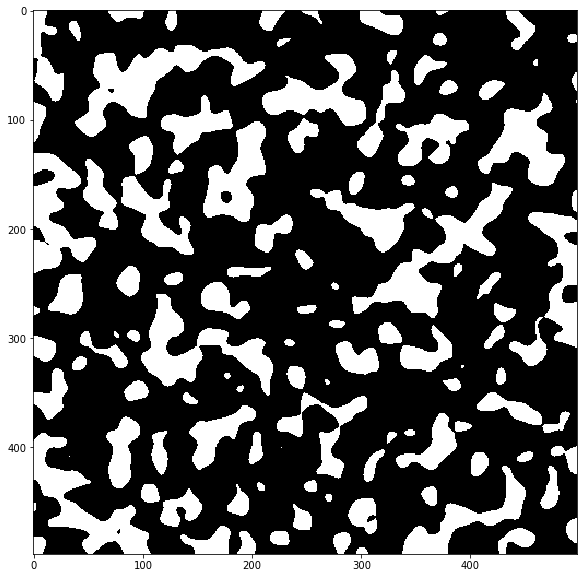

In [41]:
to_img(Y_test)

In [42]:
Y_binarized_gaus = np.concatenate(gaus_bin_img)

In [43]:
jaccard_similarity_score(Y_test, Y_binarized_gaus)

0.9609441783197045

In [45]:
import cv2
bilateral = cv2.bilateralFilter(np.asarray(img, dtype = np.uint8), 7, 1, 1)
Y_bilaterial = np.concatenate(bilateral)
jaccard_similarity_score(Y_test, Y_bilaterial)

0.5891800132255931

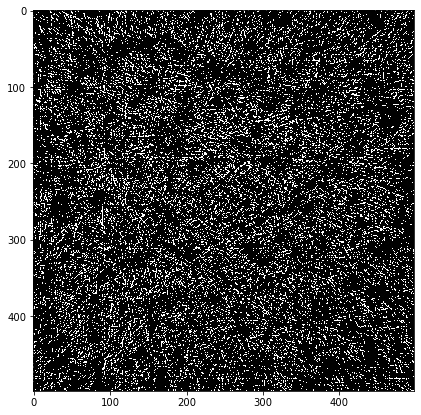

In [46]:
_, ax = plt.subplots(figsize = (7,7))
ax.imshow(bilateral, cmap = 'gray')

----------

## ADD MORE DATA AND REPEAT

In [47]:
shape = (500, 500)
porsty = 0.2
blobns = 4
noise_prob = 0
num_of_angles = 360
tag = 'train'

sinogram shape:  (708, 360)
reconstruction shape:  (708, 708)
changing existed file
editing file already exists


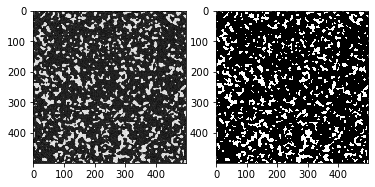

In [48]:
orig_phantom_train, proc_phantom_train = generator.create_phantom_and_process(shape, porsty, blobns, noise_prob, num_of_angles, tag)

sinogram shape:  (708, 360)
reconstruction shape:  (708, 708)
changing existed file
editing file already exists


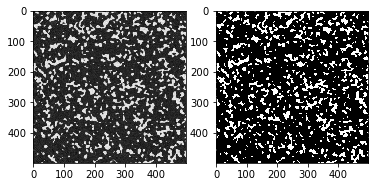

In [49]:
tag = 'test1'
orig_phantom_test, proc_phantom_test = generator.create_phantom_and_process(shape, porsty, blobns, noise_prob, num_of_angles, tag)

sinogram shape:  (708, 360)
reconstruction shape:  (708, 708)
changing existed file
editing file already exists


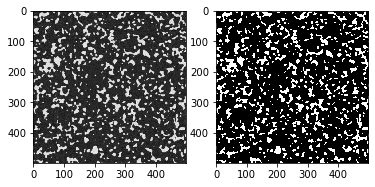

In [50]:
tag = 'test2'
orig_phantom_test, proc_phantom_test = generator.create_phantom_and_process(shape, porsty, blobns, noise_prob, num_of_angles, tag)

## View results

In [51]:
import data_manager as dm
dm.show_data_info()

files with dimension 3 does not exist


,dimension,id_indx,porositiy,blobiness,num_of_angles,noise,tags (tring array)
0,2,1,0.3,2,180,0.05,"[test, train]"
1,2,2,0.2,4,360,0.00,"[test1, test2, train]"


In [52]:
tag = 'train'
indx = 2
dim = 2

pc.count_neighbor_average_array_and_save(dim, indx, tag)

## TRAIN

In [53]:
wtr = 'csv'
pixels_df = dm.get_data(dimension=dim, id_indx=indx, what_to_return=wtr, tag=tag)

In [54]:
pixels_df.head()

,neighbor_average,proc_phantom_pixel_values,pixel_real_value
0,0.990439,1.006111,True
1,0.982748,0.991409,True
2,0.992698,0.990992,True
3,0.991696,1.037945,True
4,0.978209,0.981055,True


In [55]:
X_train = np.asarray(pixels_df[['neighbor_average', 'proc_phantom_pixel_values']])
X_train[0:5]

array([[0.99043932, 1.00611127],
       [0.98274804, 0.99140905],
       [0.99269762, 0.99099197],
       [0.9916964 , 1.03794523],
       [0.97820932, 0.98105544]])

In [56]:
Y_train = np.asarray(pixels_df['pixel_real_value'])
Y_train[0:5]

array([ True,  True,  True,  True,  True])

In [57]:
from sklearn import preprocessing
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_train[0:5]

array([[2.35182769, 2.20547906],
       [2.32897143, 2.16530265],
       [2.35853874, 2.16416291],
       [2.35556339, 2.29247096],
       [2.31548366, 2.1370096 ]])

## TEST 1

In [58]:
tag = 'test1'
indx = 2
dim = 2

pc.count_neighbor_average_array_and_save(dim, indx, tag)
wtr = 'csv'

pixels_df = dm.get_data(dimension=dim, id_indx=indx, what_to_return=wtr, tag=tag)

In [59]:
pixels_df.head()

,neighbor_average,proc_phantom_pixel_values,pixel_real_value
0,-0.007730,-0.032069,False
1,-0.008449,0.010428,False
2,-0.017308,-0.051513,False
3,-0.058818,-0.084582,False
4,-0.054641,-0.082607,False


In [60]:
X_test = np.asarray(pixels_df[['neighbor_average', 'proc_phantom_pixel_values']])
X_test[0:5]

array([[-0.00772972, -0.03206878],
       [-0.00844942,  0.01042789],
       [-0.01730751, -0.05151319],
       [-0.05881812, -0.08458213],
       [-0.05464084, -0.0826065 ]])

In [61]:
Y_test = np.asarray(pixels_df['pixel_real_value'])
Y_test[0:5]

array([False, False, False, False, False])

In [62]:
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test[0:5]

array([[-0.61054816, -0.62824124],
       [-0.6126982 , -0.51150906],
       [-0.63916094, -0.68165223],
       [-0.76317008, -0.7724878 ],
       [-0.75069082, -0.76706105]])

## TEST 2

In [63]:
tag = 'test2'
indx = 2
dim = 2

pc.count_neighbor_average_array_and_save(dim, indx, tag)
wtr = 'csv'

pixels_df = dm.get_data(dimension=dim, id_indx=indx, what_to_return=wtr, tag=tag)

In [64]:
pixels_df.head()

,neighbor_average,proc_phantom_pixel_values,pixel_real_value
0,0.887686,0.889332,True
1,0.765559,0.989216,True
2,0.512157,0.720135,True
3,0.232266,0.117945,False
4,0.022061,-0.030253,False


In [65]:
X_test = np.asarray(pixels_df[['neighbor_average', 'proc_phantom_pixel_values']])
X_test[0:5]

array([[ 0.88768646,  0.8893317 ],
       [ 0.76555916,  0.98921585],
       [ 0.51215728,  0.72013478],
       [ 0.2322655 ,  0.11794533],
       [ 0.02206088, -0.03025259]])

In [66]:
Y_test = np.asarray(pixels_df['pixel_real_value'])
Y_test[0:5]

array([ True,  True,  True, False, False])

In [67]:
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test[0:5]

array([[ 2.05416245,  1.89328619],
       [ 1.69036291,  2.16687133],
       [ 0.93551546,  1.42985169],
       [ 0.10175843, -0.21955998],
       [-0.52441068, -0.62547773]])

<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, Y_train)

Prediction:

In [69]:
yhat = LR.predict(X_test)
print(len(yhat))
print(len(X_test))

248004
248004


In [70]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(Y_test, yhat)

0.9996895211367559

## Making 2d image

In [71]:
a = np.asarray([1,2,3,4,5,6,7,8,9])

In [72]:
import matplotlib.pyplot as plt

In [73]:
def to_img(lin_arr, r = False):
    _, ax = plt.subplots(figsize = (10,10))
    size = int(round(np.sqrt(len(lin_arr))))
    img = lin_arr.reshape((size, size))
    ax.imshow(img, cmap = 'gray')
    if r:
        return img

Original img

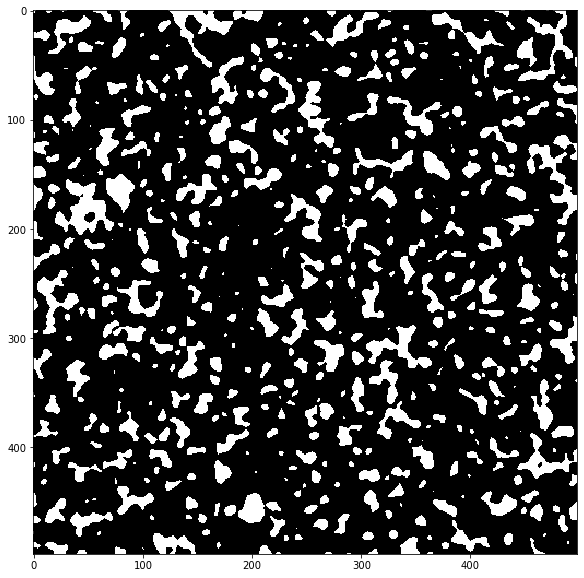

In [74]:
to_img(Y_test)

Binarized img

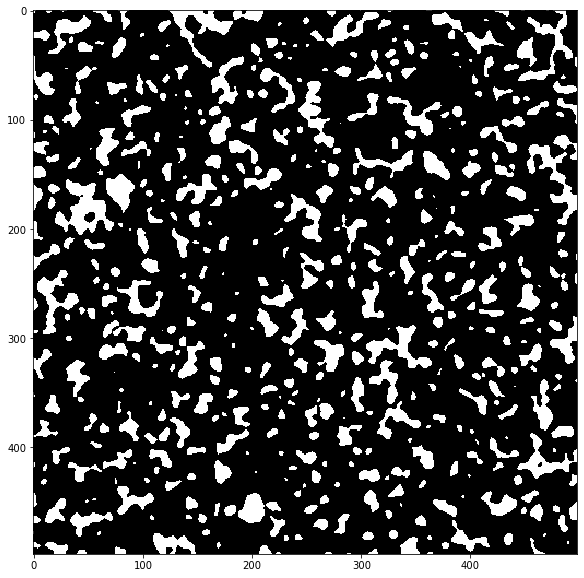

In [75]:
to_img(yhat)

In [76]:
jaccard_similarity_score(Y_test, yhat)

0.9996895211367559

## Gray img

In [77]:
X_test = np.asarray(pixels_df[['proc_phantom_pixel_values']])
X_test[0:5]

array([[ 0.8893317 ],
       [ 0.98921585],
       [ 0.72013478],
       [ 0.11794533],
       [-0.03025259]])

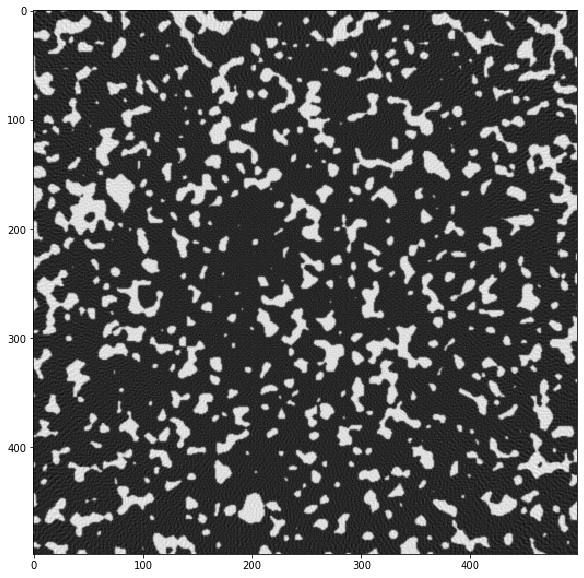

In [78]:
img = to_img(X_test, True)

In [79]:
def binarize(signal, threshold=0.5):
    signal = np.asarray(signal)
    return signal > threshold

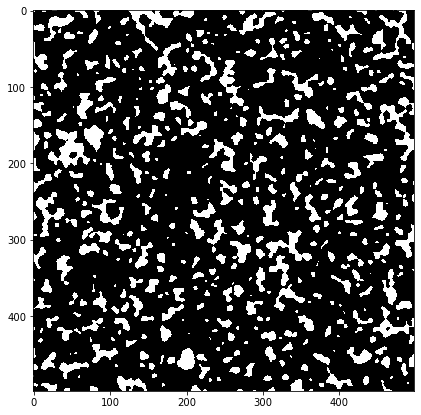

In [80]:
bin_img = binarize(img)
_, ax = plt.subplots(figsize = (7,7))
ax.imshow(bin_img, cmap = 'gray')

In [81]:
Y_binarized = np.concatenate(bin_img)

In [82]:
jaccard_similarity_score(Y_test, Y_binarized)

0.9997177464879599

## Otsu

In [83]:
def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weigth = 1.0/pixel_number
    his, bins = np.histogram(gray, np.arange(0,257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)
    for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])
        Wb = pcb * mean_weigth
        Wf = pcf * mean_weigth

        mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
        #print mub, muf
        value = Wb * Wf * (mub - muf) ** 2

        if value > final_value:
            final_thresh = t
            final_value = value
    final_img = gray.copy()
    print(final_thresh)
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img

In [84]:
otsu_bin_img = otsu(img)

C:\Users\Anvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


1


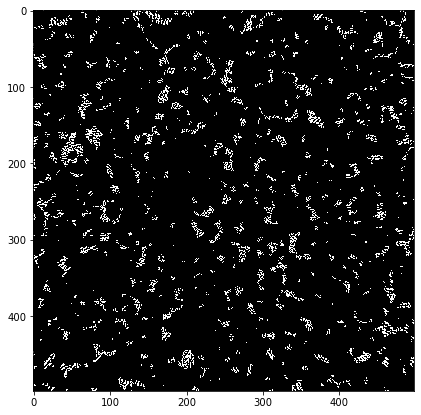

In [85]:
_, ax = plt.subplots(figsize = (7,7))
ax.imshow(otsu_bin_img, cmap = 'gray')

In [86]:
Y_binarized_otsu = np.concatenate(otsu_bin_img)

In [87]:
jaccard_similarity_score(Y_test, Y_binarized_otsu)

0.8017411009499846

## Gaus+binarization

In [88]:
from scipy.ndimage import gaussian_filter as gfilter

In [89]:
gaus_bin_img = binarize(gfilter(img, 3))

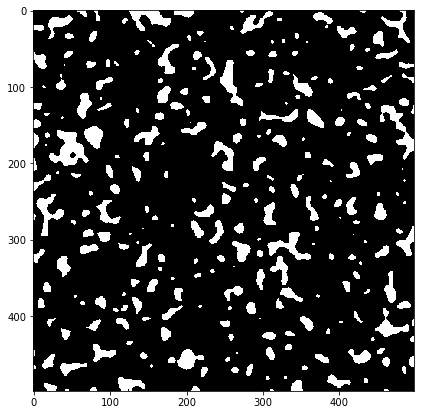

In [90]:
_, ax = plt.subplots(figsize = (7,7))
ax.imshow(gaus_bin_img, cmap = 'gray')

original:

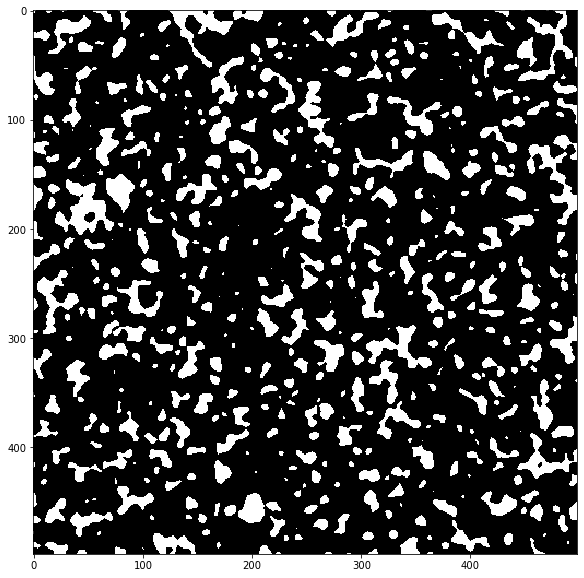

In [91]:
to_img(Y_test)

In [92]:
Y_binarized_gaus = np.concatenate(gaus_bin_img)

In [93]:
jaccard_similarity_score(Y_test, Y_binarized_gaus)

0.9252431412396575

In [94]:
bilateral = cv2.bilateralFilter(np.asarray(img, dtype = np.uint8), 7, 1, 1)
Y_bilaterial = np.concatenate(bilateral)
jaccard_similarity_score(Y_test, Y_bilaterial)

0.8451799164529604

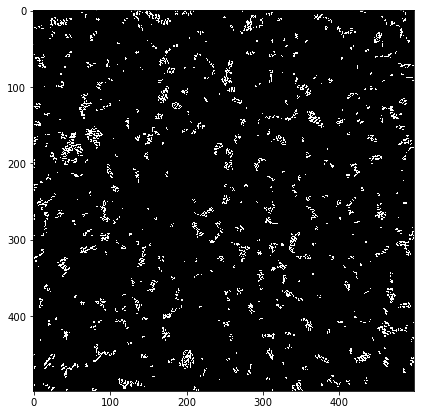

In [95]:
_, ax = plt.subplots(figsize = (7,7))
ax.imshow(bilateral, cmap = 'gray')

## TEST 2

In [96]:
tag = 'test2'
indx = 2
dim = 2

pc.count_neighbor_average_array_and_save(dim, indx, tag)
wtr = 'csv'

pixels_df = dm.get_data(dimension=dim, id_indx=indx, what_to_return=wtr, tag=tag)

In [97]:
pixels_df.head()

,neighbor_average,proc_phantom_pixel_values,pixel_real_value
0,0.887686,0.889332,True
1,0.765559,0.989216,True
2,0.512157,0.720135,True
3,0.232266,0.117945,False
4,0.022061,-0.030253,False


In [98]:
X_test = np.asarray(pixels_df[['neighbor_average', 'proc_phantom_pixel_values']])
X_test[0:5]

array([[ 0.88768646,  0.8893317 ],
       [ 0.76555916,  0.98921585],
       [ 0.51215728,  0.72013478],
       [ 0.2322655 ,  0.11794533],
       [ 0.02206088, -0.03025259]])

In [99]:
Y_test = np.asarray(pixels_df['pixel_real_value'])
Y_test[0:5]

array([ True,  True,  True, False, False])

In [100]:
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test[0:5]

array([[ 2.05416245,  1.89328619],
       [ 1.69036291,  2.16687133],
       [ 0.93551546,  1.42985169],
       [ 0.10175843, -0.21955998],
       [-0.52441068, -0.62547773]])

<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, Y_train)

Prediction:

In [102]:
yhat = LR.predict(X_test)
print(len(yhat))
print(len(X_test))

248004
248004


In [103]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(Y_test, yhat)

0.9996895211367559

## Making 2d image

In [104]:
a = np.asarray([1,2,3,4,5,6,7,8,9])

In [105]:
import matplotlib.pyplot as plt

In [106]:
def to_img(lin_arr, r = False):
    _, ax = plt.subplots(figsize = (10,10))
    size = int(round(np.sqrt(len(lin_arr))))
    img = lin_arr.reshape((size, size))
    ax.imshow(img, cmap = 'gray')
    if r:
        return img

Original img

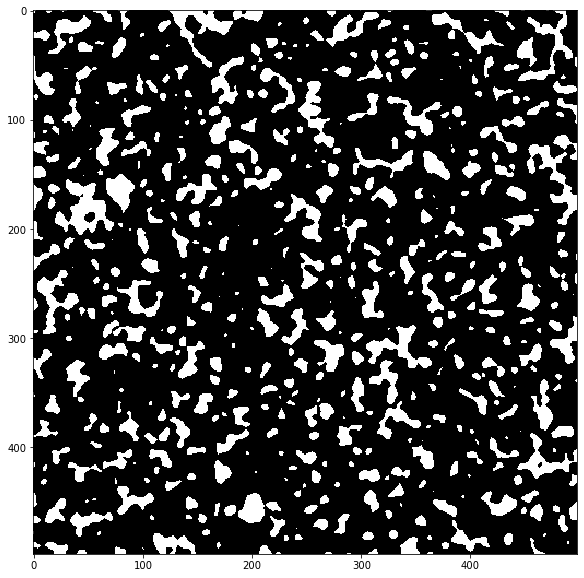

In [107]:
to_img(Y_test)

Binarized img

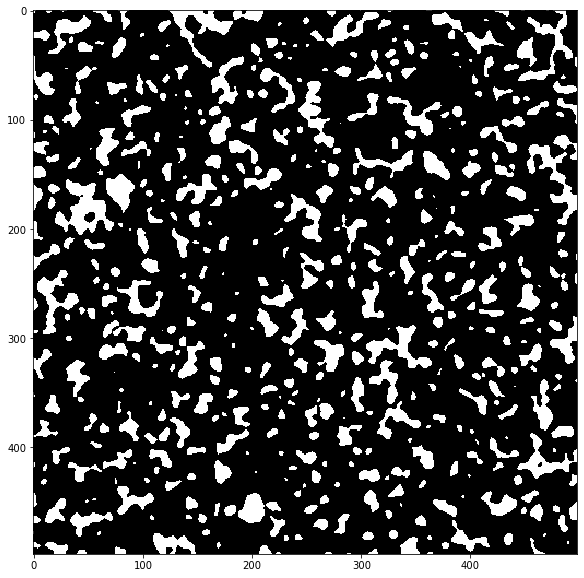

In [108]:
to_img(yhat)

In [109]:
jaccard_similarity_score(Y_test, yhat)

0.9996895211367559

## Gray img

In [110]:
X_test = np.asarray(pixels_df[['proc_phantom_pixel_values']])
X_test[0:5]

array([[ 0.8893317 ],
       [ 0.98921585],
       [ 0.72013478],
       [ 0.11794533],
       [-0.03025259]])

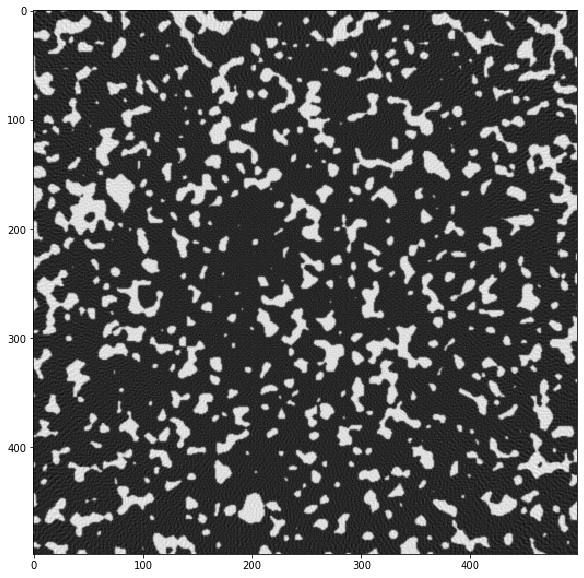

In [111]:
img = to_img(X_test, True)

In [112]:
def binarize(signal, threshold=0.5):
    signal = np.asarray(signal)
    return signal > threshold

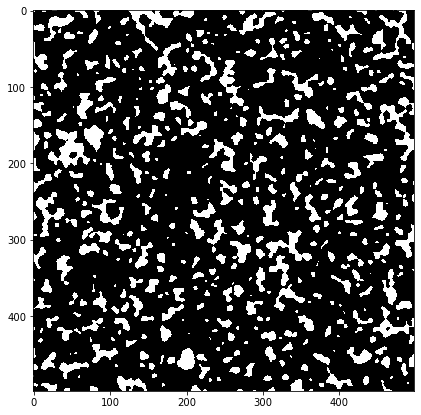

In [113]:
bin_img = binarize(img)
_, ax = plt.subplots(figsize = (7,7))
ax.imshow(bin_img, cmap = 'gray')

In [114]:
Y_binarized = np.concatenate(bin_img)

In [115]:
jaccard_similarity_score(Y_test, Y_binarized)

0.9997177464879599

## Otsu

In [116]:
def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weigth = 1.0/pixel_number
    his, bins = np.histogram(gray, np.arange(0,257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)
    for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])
        Wb = pcb * mean_weigth
        Wf = pcf * mean_weigth

        mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
        #print mub, muf
        value = Wb * Wf * (mub - muf) ** 2

        if value > final_value:
            final_thresh = t
            final_value = value
    final_img = gray.copy()
    print(final_thresh)
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img

In [117]:
otsu_bin_img = otsu(img)

C:\Users\Anvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


1


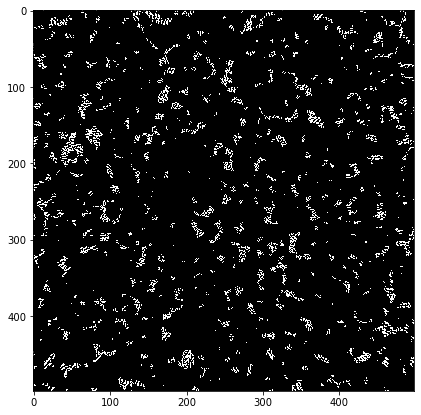

In [118]:
_, ax = plt.subplots(figsize = (7,7))
ax.imshow(otsu_bin_img, cmap = 'gray')

In [119]:
Y_binarized_otsu = np.concatenate(otsu_bin_img)

In [120]:
jaccard_similarity_score(Y_test, Y_binarized_otsu)

0.8017411009499846

## Gaus+binarization

In [121]:
from scipy.ndimage import gaussian_filter as gfilter

In [122]:
gaus_bin_img = binarize(gfilter(img, 3))

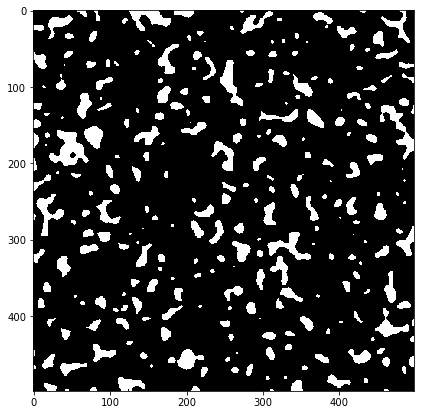

In [123]:
_, ax = plt.subplots(figsize = (7,7))
ax.imshow(gaus_bin_img, cmap = 'gray')

original:

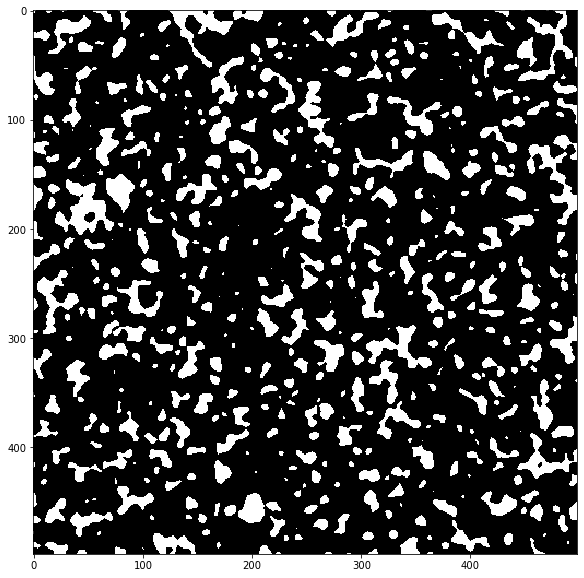

In [124]:
to_img(Y_test)

In [125]:
Y_binarized_gaus = np.concatenate(gaus_bin_img)

In [126]:
jaccard_similarity_score(Y_test, Y_binarized_gaus)

0.9252431412396575

In [127]:
bilateral = cv2.bilateralFilter(np.asarray(img, dtype = np.uint8), 7, 1, 1)
Y_bilaterial = np.concatenate(bilateral)
jaccard_similarity_score(Y_test, Y_bilaterial)

0.8451799164529604

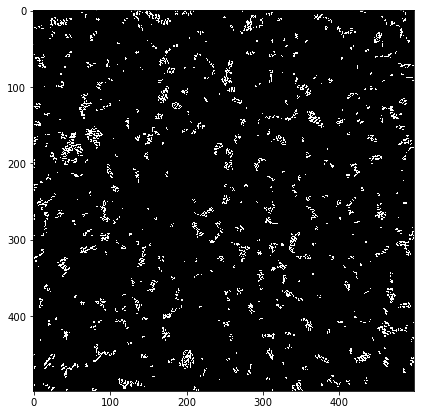

In [128]:
_, ax = plt.subplots(figsize = (7,7))
ax.imshow(bilateral, cmap = 'gray')